# Data prep to make multiple categorical variables useable

In [1]:
# Data Imports
import numpy as np
import pandas as pd


# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

In [2]:
df = pd.read_csv('tmdb_tv_dataset_small.csv', converters={'genres': eval, 'episode_run_time': eval})
df.head()

,id,popularity,vote_count,name,first_air_date,backdrop_path,overview,genre_ids,original_name,original_language,...,number_of_episodes,number_of_seasons,origin_country_y,production_companies,production_countries,seasons,spoken_languages,status,tagline,type
0,76773,238.249,550,Station 19,2018-03-22,/PB1agKtni7zo4fea8yk6y4iE5L.jpg,A group of heroic firefighters at Seattle Fire...,"[10759, 18]",Station 19,en,...,46,4,['US'],"[{'id': 34209, 'logo_path': '/chuOOQxixQL4fa9L...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'air_date': '2018-03-22', 'episode_count': 1...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,Courage under fire.,Scripted
1,71790,230.154,303,S.W.A.T.,2017-11-02,/gJSqr2prvTegFbL0cEWK9Qti3Vs.jpg,A locally born and bred S.W.A.T. lieutenant is...,"[10759, 80, 18]",S.W.A.T.,en,...,71,4,['US'],"[{'id': 11073, 'logo_path': '/wHs44fktdoj6c378...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'air_date': '2017-11-02', 'episode_count': 2...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,Serve • Protect • Unite,Scripted
2,65494,253.691,647,The Crown,2016-11-04,/4InrdamBEM31unNiuEHGYTPX1e2.jpg,"The gripping, decades-spanning inside story of...",[18],The Crown,en,...,40,4,"['GB', 'US']","[{'id': 5340, 'logo_path': '/zHQ48Hg1In6SJB7WW...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'air_date': '2016-11-04', 'episode_count': 1...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,Times change. Duty endures.,Scripted
3,60735,231.088,6222,The Flash,2014-10-07,/z59kJfcElR9eHO9rJbWp4qWMuee.jpg,After a particle accelerator causes a freak st...,"[18, 10765]",The Flash,en,...,134,7,['US'],"[{'id': 1957, 'logo_path': '/3T19XSr6yqaLNK8uJ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'air_date': '2016-04-19', 'episode_count': 5...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,The fastest man alive.,Scripted
4,44006,214.268,965,Chicago Fire,2012-10-10,/W5geO8tq68ng4TsXyZ81phcPiz.jpg,An edge-of-your-seat view into the lives of ev...,[18],Chicago Fire,en,...,182,9,['US'],"[{'id': 26727, 'logo_path': '/jeTxdjXhzgKZyLr3...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'air_date': '2012-10-10', 'episode_count': 2...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,Feel the heat,Scripted


In [3]:
df.isnull().sum()

id                         0
popularity                 0
vote_count                 0
name                       0
first_air_date             0
backdrop_path             94
overview                  54
genre_ids                  0
original_name              0
original_language          0
vote_average               0
poster_path               24
origin_country_x           0
created_by                 0
episode_run_time           0
genres                     0
homepage                 365
in_production              0
languages                  0
last_air_date              3
last_episode_to_air        3
next_episode_to_air     1451
networks                   0
number_of_episodes         0
number_of_seasons          0
origin_country_y           0
production_companies       0
production_countries       0
seasons                    0
spoken_languages           0
status                     0
tagline                 1239
type                       0
dtype: int64

In [4]:
# drop rows with empty episode run times
df = df[df['episode_run_time'].map(lambda d: len(d)) > 0]

In [5]:
df.shape

(1507, 33)

"The TV series data recorded on IMDb websites were extracted and provided by Andrej Krevl from the Stanford SNAP
Research Group. We filtered and cleaned the data by excluding the TV series with very small numbers of ratings, say
less than 10 viewer ratings, and those with missing feature information for the accuracy of prediction. Features of the
data set include the genre (vector of Booleans), release year (numeric), number of seasons (numeric), number of
episodes for each season (numeric), number of ratings (numeric), number of critics (numeric), number of reviewers
(numeric), runtime (numeric), aspect ratio (categorical), and color (Boolean). We randomly selected 450 complete
samples from the data set for testing and training purposes."

First, we will try to replicate the dataset created in the research paper, using TMDB data instead of IMDB data. There will be differences and columns that differ between each dataset, and we will observe the overall prediction power using columns that are unique to TMDB

In [6]:
# create a data frame with the above features

# FEATURES
# genres (is an array of objects, [{id, name}]. first convert to array of strings, then one hot encode)
genres_col = df['genres'].copy()

# release year (is a string)
first_air_date_col = df['first_air_date'].copy()

# number of seasons
number_of_seasons_col = df['number_of_seasons'].copy()

# number of episodes
number_of_episodes_col = df['number_of_episodes'].copy()

# number of ratings
vote_count_col = df['vote_count'].copy()

# number of critics: not available

# number of reviewers: not available

# runtime (is an array[int])
episode_run_time_col = df['episode_run_time'].copy()

# aspect ratio: not available

# color: not available

# TARGET
# average rating
vote_average_col = df['vote_average'].copy()

Now, we have to further transform the genres and episode_run_time columns to make them useable in logistic regression

In [7]:
type(genres_col)

pandas.core.series.Series

In [8]:
type(episode_run_time_col)

pandas.core.series.Series

In [9]:
genres_col.head()

0    [{'id': 10759, 'name': 'Action & Adventure'}, ...
1    [{'id': 10759, 'name': 'Action & Adventure'}, ...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 18, 'name': 'Drama'}, {'id': 10765, 'n...
4                        [{'id': 18, 'name': 'Drama'}]
Name: genres, dtype: object

In [10]:
episode_run_time_col.head()

0    [43]
1    [42]
2    [52]
3    [44]
4    [60]
Name: episode_run_time, dtype: object

In [11]:
# transform all entries in genres_df from [{id, name}] to [name]
genre_strings_col = genres_col.apply(lambda x: [genre['name'] for genre in x])

In [12]:
genre_strings_col[0]

['Action & Adventure', 'Drama']

In [13]:
import statistics

In [14]:
episode_run_time_col.isnull().sum()

0

In [15]:
# get the mean episode runtimes to represent runtime
mean_runtime_col = episode_run_time_col.apply(lambda x: statistics.mean(x))

In [16]:
mean_runtime_col.head()

0    43.0
1    42.0
2    52.0
3    44.0
4    60.0
Name: episode_run_time, dtype: float64

In [17]:
first_air_date_col.head()

0    2018-03-22
1    2017-11-02
2    2016-11-04
3    2014-10-07
4    2012-10-10
Name: first_air_date, dtype: object

Realized I have to handle date times... 
https://stackoverflow.com/a/16456128

https://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn

In [18]:
# convert string start dates to be datetime values, 
# and then further transform to ordinal values so that classifier can properly interpret the meaning of dates
first_air_datetime_ordinal_col = first_air_date_col.apply(lambda x: pd.to_datetime(x).toordinal())

In [19]:
first_air_datetime_ordinal_col.head()

0    736775
1    736635
2    736272
3    735513
4    734786
Name: first_air_date, dtype: int64

In [20]:
# one-hot encode the genres and finish initial data preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In order to properly one-hot encode our genres column, we need to use the MultiLabelBinarizer from sklearn. This handles nested categorical data, which is what our genres column is (a series of list of string).

https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

We start by forming the final starting dataframe

In [21]:
start_df = pd.DataFrame(
        {
            'first_air_datetime_ordinal': first_air_datetime_ordinal_col, 
            'number_of_seasons': number_of_seasons_col, 
            'number_of_episodes': number_of_episodes_col, 
            'vote_count': vote_count_col, 
            'mean_runtime': mean_runtime_col,
            'vote_average' : vote_average_col
        })

Now, we one-hot encode the genres and add it to our dataframe

In [22]:
start_df = start_df.join(
    pd.DataFrame(
        mlb.fit_transform(genre_strings_col), 
        columns=mlb.classes_,
        index=df.index))

In [23]:
start_df.columns

Index(['first_air_datetime_ordinal', 'number_of_seasons', 'number_of_episodes',
       'vote_count', 'mean_runtime', 'vote_average', 'Action',
       'Action & Adventure', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Kids', 'Music', 'Mystery', 'News', 'Reality', 'Romance',
       'Sci-Fi & Fantasy', 'Science Fiction', 'Soap', 'Talk', 'War',
       'War & Politics', 'Western'],
      dtype='object')

In [24]:
start_df.head()

,first_air_datetime_ordinal,number_of_seasons,number_of_episodes,vote_count,mean_runtime,vote_average,Action,Action & Adventure,Adventure,Animation,...,News,Reality,Romance,Sci-Fi & Fantasy,Science Fiction,Soap,Talk,War,War & Politics,Western
0,736775,4,46,550,43.0,8.2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,736635,4,71,303,42.0,7.6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,736272,4,40,647,52.0,8.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,735513,7,134,6222,44.0,7.6,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,734786,9,182,965,60.0,8.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
start_df.isnull().sum()

first_air_datetime_ordinal    0
number_of_seasons             0
number_of_episodes            0
vote_count                    0
mean_runtime                  0
vote_average                  0
Action                        0
Action & Adventure            0
Adventure                     0
Animation                     0
Comedy                        0
Crime                         0
Documentary                   0
Drama                         0
Family                        0
Fantasy                       0
History                       0
Horror                        0
Kids                          0
Music                         0
Mystery                       0
News                          0
Reality                       0
Romance                       0
Sci-Fi & Fantasy              0
Science Fiction               0
Soap                          0
Talk                          0
War                           0
War & Politics                0
Western                       0
dtype: i

## Create a categorical column to represent overall popularity

The final step to take is to convert our current target, vote_average, into a categorical class variable. The strategy used by the stanford students was to segment the vote_average data into multiple buckets (fair for below 8, good for 8-9, and Very popular for above 9). 

We will explore our data further to determine possible segmentation strategies

In [26]:
import matplotlib.pyplot as plt

(array([ 21.,  11.,   7.,   7.,  25.,  63., 306., 704., 347.,  16.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

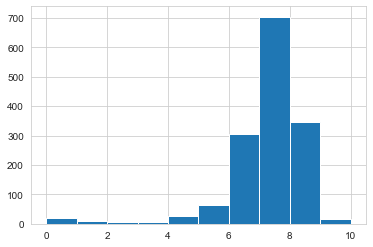

In [27]:
# Histogram of vote_average (current target we are looking at)
plt.hist(start_df['vote_average'])

In [28]:
start_df['vote_average'].describe()

count    1507.000000
mean        7.162973
std         1.391311
min         0.000000
25%         6.800000
50%         7.400000
75%         7.900000
max        10.000000
Name: vote_average, dtype: float64

From the histogram above, we can see that 7-8 is a distinct category, and 7.16 is the mean of the column. 

We can also see that two other distinct categories exist below 7 and above 8. It seems possible to further segment the data, however the largest groupings of ratings seem to exist at the 'below 7', '7-8', and 'above 8' zones. Therefore, we will attempt to use 3 categories to segment the vote_average target.

To perform this operation, I have researched existing methods to turn continuous data into categorical data: https://www.absentdata.com/pandas/pandas-cut-continuous-to-categorical/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [29]:
rating_category = pd.cut(start_df['vote_average'], [0, 6, 8, 10], labels=['below average', 'average', 'above average'], include_lowest=True)

In [30]:
start_df['rating_category'] = rating_category

In [31]:
start_df.head()

,first_air_datetime_ordinal,number_of_seasons,number_of_episodes,vote_count,mean_runtime,vote_average,Action,Action & Adventure,Adventure,Animation,...,Reality,Romance,Sci-Fi & Fantasy,Science Fiction,Soap,Talk,War,War & Politics,Western,rating_category
0,736775,4,46,550,43.0,8.2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,above average
1,736635,4,71,303,42.0,7.6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,average
2,736272,4,40,647,52.0,8.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,above average
3,735513,7,134,6222,44.0,7.6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,average
4,734786,9,182,965,60.0,8.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,above average


In [32]:
start_df['rating_category'].describe()

count        1507
unique          3
top       average
freq         1044
Name: rating_category, dtype: object

In [33]:
# check to see if this operation created any NaN/ null values
start_df.isnull().sum()

first_air_datetime_ordinal    0
number_of_seasons             0
number_of_episodes            0
vote_count                    0
mean_runtime                  0
vote_average                  0
Action                        0
Action & Adventure            0
Adventure                     0
Animation                     0
Comedy                        0
Crime                         0
Documentary                   0
Drama                         0
Family                        0
Fantasy                       0
History                       0
Horror                        0
Kids                          0
Music                         0
Mystery                       0
News                          0
Reality                       0
Romance                       0
Sci-Fi & Fantasy              0
Science Fiction               0
Soap                          0
Talk                          0
War                           0
War & Politics                0
Western                       0
rating_c

Before proceeding, we drop our original target column of vote_average, as we will now only be predicting rating_category

In [34]:
start_df = start_df.drop('vote_average', axis = 1)

Now, we are finally ready to run logistic regression!

# Run logistic regression using these variables

In [35]:
# note: start_df.drop will not alter start_df in place, so our original start_df is unharmed!
# note 2: we omit vote_average from the X feature set, as it is directly related to rating_category 
# from the segmentation we did earlier
X = start_df.drop('rating_category', axis = 1)
Y = start_df['rating_category']

In [36]:
X

,first_air_datetime_ordinal,number_of_seasons,number_of_episodes,vote_count,mean_runtime,Action,Action & Adventure,Adventure,Animation,Comedy,...,News,Reality,Romance,Sci-Fi & Fantasy,Science Fiction,Soap,Talk,War,War & Politics,Western
0,736775,4,46,550,43.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,736635,4,71,303,42.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,736272,4,40,647,52.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,735513,7,134,6222,44.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,734786,9,182,965,60.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,735169,5,398,2,48.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1553,735697,1,24,172,24.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1554,732725,9,41,49,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1555,737118,1,8,31,45.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
Y

0       above average
1             average
2       above average
3             average
4       above average
            ...      
1552    below average
1553    above average
1554          average
1555          average
1556          average
Name: rating_category, Length: 1507, dtype: category
Categories (3, object): [below average < average < above average]

In [38]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make our logistic regression model
start_model = LogisticRegression()

# Fit the model
start_model.fit(X_train,Y_train)

/Users/derekxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# Predict the classes of the testing data set
class_predict = start_model.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.6843501326259946

Based on this initial result, we can be sure that our naive feature set was at least somewhat correlated with predicting the target. This shows us that we can be confident in moving forward with this feature set and optimizing it as we go.

In order to improve our model's predictive accuracy, we can try various strategies, such as cleaning our data further, improving prediction accuracy by adding more features to our feature set, or trying classification using different supervised learning algorithms.

We will start by cleaning our data more.

## Further data cleaning

The Stanford students cleaned their data by removing records where there were a very small number of ratings.

In order to determine what the threshold of "very small number of ratings" is, we will again use a histogram to plot out the frequency of certain ranges of vote counts from our original df

(array([1.403e+03, 7.300e+01, 1.900e+01, 6.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  622.2, 1244.4, 1866.6, 2488.8, 3111. , 3733.2, 4355.4,
        4977.6, 5599.8, 6222. ]),
 <a list of 10 Patch objects>)

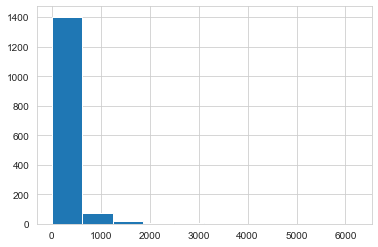

In [40]:
plt.hist(df['vote_count'])

We can see from this that the majority of vote counts are between 0-622.2. 10 bins were returned in the last section, so lets try 200 bins

(array([409., 207., 147., 122.,  95.,  72.,  56.,  43.,  52.,  34.,  27.,
         32.,  23.,  12.,  19.,  13.,  13.,  10.,  10.,   7.,  12.,   6.,
          7.,   4.,   2.,   5.,   9.,   5.,   2.,   4.,   2.,   2.,   2.,
          0.,   3.,   1.,   1.,   1.,   2.,   3.,   5.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   1.,   0.,   2.,   1.,   0.,   2.,   1.,
          2.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

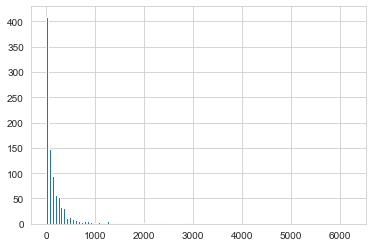

In [41]:
plt.hist(df['vote_count'], bins=200)

From this, we can still see that the overwhelming majority of votes is between 0-31.11, the first bucket out of 200. 

In [42]:
df.loc[(df['vote_count'] >= 0) & (df['vote_count'] <= 10)].shape

(197, 33)

In [43]:
df.loc[(df['vote_count'] >= 10) & (df['vote_count'] <= 20)].shape

(123, 33)

In [44]:
df.loc[(df['vote_count'] >= 20) & (df['vote_count'] <= 30)].shape

(100, 33)

In [45]:
type(df.loc[(df['vote_count'] >= 0) & (df['vote_count'] <= 10)])

pandas.core.frame.DataFrame

From this further investigation, we can see that there are 197 rows in our original dataframe whose vote_count is between 0-10. Therefore, we will drop all rows with vote_count between 0-10 and retrain our model

In [46]:
rows_to_drop = df.loc[(df['vote_count'] >= 0) & (df['vote_count'] <= 10)].index.tolist()

In [47]:
rows_to_drop

[18,
 47,
 78,
 91,
 92,
 93,
 96,
 104,
 116,
 159,
 174,
 175,
 193,
 205,
 223,
 244,
 265,
 284,
 312,
 318,
 328,
 330,
 334,
 335,
 337,
 373,
 376,
 390,
 396,
 404,
 409,
 415,
 425,
 436,
 457,
 475,
 513,
 514,
 538,
 543,
 557,
 560,
 578,
 586,
 590,
 597,
 602,
 612,
 617,
 620,
 635,
 660,
 686,
 691,
 695,
 717,
 730,
 733,
 736,
 738,
 740,
 751,
 753,
 757,
 767,
 778,
 788,
 799,
 810,
 814,
 819,
 826,
 840,
 843,
 845,
 853,
 858,
 860,
 862,
 871,
 873,
 877,
 879,
 894,
 905,
 921,
 922,
 938,
 947,
 948,
 949,
 964,
 972,
 977,
 978,
 989,
 990,
 996,
 999,
 1000,
 1011,
 1014,
 1015,
 1020,
 1024,
 1030,
 1042,
 1056,
 1066,
 1072,
 1075,
 1077,
 1090,
 1092,
 1115,
 1129,
 1137,
 1153,
 1155,
 1157,
 1164,
 1165,
 1166,
 1170,
 1171,
 1185,
 1186,
 1200,
 1203,
 1209,
 1220,
 1223,
 1229,
 1230,
 1231,
 1238,
 1244,
 1250,
 1253,
 1255,
 1258,
 1262,
 1267,
 1282,
 1286,
 1289,
 1295,
 1311,
 1325,
 1328,
 1332,
 1333,
 1335,
 1337,
 1356,
 1359,
 1360,
 1372,


In [48]:
second_df = start_df.drop(rows_to_drop)

In [49]:
second_df.shape

(1310, 31)

In [50]:
start_df.shape

(1507, 31)

In [51]:
print(1507-1310)

197


As expected, 197 rows were dropped corresponding to the rows of our original dataframe that had vote_counts between 0-10. Lets now try training our model again

In [52]:
# note: start_df.drop will not alter start_df in place, so our original start_df is unharmed!
X = second_df.drop('rating_category', axis = 1)
Y = second_df['rating_category']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make our logistic regression model
second_model = LogisticRegression()

# Fit the model
second_model.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = second_model.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

/Users/derekxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6798780487804879

In [53]:
confusion_matrix = metrics.confusion_matrix(y_true=Y_test, y_pred=class_predict, labels=['below average', 'average', 'above average'])

In [54]:
confusion_matrix

array([[  2,  18,   0],
       [  0, 219,   4],
       [  0,  83,   2]])

This bit of data cleaning granted us a 3% improvement in accuracy! 

We will now proceed with adding in more features to make predictions on.

## Adding to the feature set

At this point, the Stanford researchers concluded their work. However, possibly due to a smaller dataset, or data that is less accurate due to TMDB being a smaller and less popular web resource as compared to IMDB which they used, we will have to incorporate additional features to make predictions using. 

https://www.diva-portal.org/smash/get/diva2:1106715/FULLTEXT01.pdf

By investigating previous work done in the field of predicting the success of Movies based on features available prior to box office release, we can draw interesting conclusions.

Firstly, we see that Actors, Directors, Writers, and Budgets are features that are accounted for in the above study.(https://www.diva-portal.org/smash/get/diva2:1106715/FULLTEXT01.pdf) 

Similar fields that are available to us from TMDB are: 
- created_by, an array of objects 
- networks, an array of objects
- production_companies, an array of objects

Also available is data under the /credits api endpoint on TMDb. However, processing this data will not be feasible because it is not structured based on popularity of the actors, and attempting to one-hot encode a list of hundreds of actors, directors, extras, etc. will not be feasible. 

The authors of (https://www.diva-portal.org/smash/get/diva2:1106715/FULLTEXT01.pdf) elected to use a decision tree classifier for the purposes of movie performance prediction, as opposed to the logistic regression model used in the stanford paper. We will attempt to adopt this model now.

Additionally, I will drop the vote_count feature at this point in time. Many prior works including  (https://www.diva-portal.org/smash/get/diva2:1106715/FULLTEXT01.pdf) , (http://cs229.stanford.edu/proj2015/256_report.pdf) that use IMDb data incorporate the number of ratings/votes as a feature. However, for the purposes of this report, I believe that this column should be dropped entirely, since Netflix and other streaming platforms that are planning to rotate their catalogue of TV shows based on their own proprietary viewership will not be able to provide their vote_counts in a way that can correspond meaningfully with TMDb's own proprietary vote_count data. Therefore, we will proceed without using this column, and make predictions on data that is as open-source as possible.


Prior works such including
(https://www.tandfonline.com/doi/full/10.1080/07421222.2016.1243969?casa_token=fhRY1Aba6ywAAAAA%3A5R579Zqpd1hLiXQizWaMB2dw6Kz0l3aw3-yayDENBijySlMIBo1g19YI1HphY8QO8NneyQT8U231lg),
(https://ieeexplore.ieee.org/abstract/document/7087152?casa_token=rAr4g9Yly0oAAAAA:wJtQVCEoCbBmbQQMSFBrW2wVH9qJNNCAHrTmSJyjQXwr2D7FG-r7sGTYoZUr76bYA0bkE7hrPQ)

approach feature selection for Movie success predictions from a different perspective as well. By performing analysis of data such as the plot, wikipedia articles, tweets, etc. they are able to enhance the predictive power of their models. Applying such principles to our supervised learning process may enhance the predictive power of this model.

By applying the techniques above and dropping non-independent/proprietary features (vote_count), we are able to utilize strategies used in similar predictive scenarios for movies, and make our predictions much more aligned with predicting the success of a TV show being picked up by a streaming service, which may not have ever aired, as opposed to predicting success of TV shows that have already aired like in the stanford work. 

Let start!

## Drop vote_count

In [55]:
# drop vote_count from second_df, and try logistic regression again
third_df = second_df.drop('vote_count', axis=1)

# note: start_df.drop will not alter start_df in place, so our original start_df is unharmed!
X = third_df.drop('rating_category', axis = 1)
Y = third_df['rating_category']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make our logistic regression model
third_model = LogisticRegression()

# Fit the model
third_model.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = third_model.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.7713414634146342

We note here that there is a minimal decrease in the accuracy, despite dropping the vote_count feature!

Now, we attempt to use a decision tree classifier directly on our data

## Use Decision Tree classifier

In [56]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# we opt to use the default min_samples_split here
classifier_model = DecisionTreeClassifier()

In [57]:
# note: start_df.drop will not alter start_df in place, so our original start_df is unharmed!
X = third_df.drop('rating_category', axis = 1)
Y = third_df['rating_category']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Fit the model
classifier_model.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = classifier_model.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.6737804878048781

We note a decrease in the overall prediction accuracy of the decision tree as compared to logistic regression.

To fix this, we can try to tune our decision tree parameters:
https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

This (https://arxiv.org/abs/1812.02207) research paper indicates through empirical analysis that for the CART algorithm, which is used by the sklearn decision tree classifier (https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart), "hyperparameters such as ‘minsplit’ and
‘minbucket’ are the most responsible for the performance of the final trees"

Therefore, we will investigate how altering min_samples_split and min_samples_leaf, which correspond to 'minsplit' and 'minbucket' respectively, will alter the performance of our decision tree.

In [58]:
# multiply both default values by 5
classifier_model_2 = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)

# Fit the model
classifier_model.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = classifier_model.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.6676829268292683

In [59]:
# randomized trial
classifier_model_3 = DecisionTreeClassifier(min_samples_split=9, min_samples_leaf=3)

# Fit the model
classifier_model.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = classifier_model.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.6707317073170732

After a few attempts, it seems that performance enhancements by altering these hyperparameters are largely random and redundant. We avoid extremely large values, as they were reported to have very poor performance in the paper  (https://arxiv.org/abs/1812.02207) on page 16.

## Adding to our feature set

The intution for adding this column is that we need some way of measuring the success of a TV show based on the actual people involved with the show. Since the TMDB dataset lacks a "directors" or "star actors" feature, I believe that the "created_by" feature best approximates the features used in the previous works such as (https://www.diva-portal.org/smash/get/diva2:1106715/FULLTEXT01.pdf). 

Production companies is another possibility, however intuitively, there are very few large production companies, but all TV shows must be produced by them, or independently. There exist large production companies that have produced hit TV shows, and also much less popular tv shows. Creators on the other hand have a much closer artistic relationship with the TV shows that they create, possibly implying a stronger relationship that could be capitalized on by our supervised learning algorithms. 

In [60]:
df['created_by'].describe()

count     1507
unique    1203
top         []
freq       305
Name: created_by, dtype: object

In [61]:
df['production_companies'].describe()

count     1507
unique     983
top         []
freq       323
Name: production_companies, dtype: object

After this investigation, neither the created_by, nor production_companies features are good candidates for adding into our feature set. Both contain a very large amount of unique values, and the most frequently repeating value for both is an empty array. One-hot encoding such data would result in 1000+ columns. Therefore, we abandon this approach

## Add overview to feature set, TF-IDF analysis

Previous research papers (https://www.tandfonline.com/doi/full/10.1080/07421222.2016.1243969?casa_token=fhRY1Aba6ywAAAAA%3A5R579Zqpd1hLiXQizWaMB2dw6Kz0l3aw3-yayDENBijySlMIBo1g19YI1HphY8QO8NneyQT8U231lg) have discussed the efficacy of studying plot synopses of movies in predicting their performance prior to release. We will attempt to replicate this using the 'overview' feature of our original df

In [62]:
df['overview'].describe()

count                                                  1470
unique                                                 1470
top       Camelot is a historical-fantasy-drama televisi...
freq                                                      1
Name: overview, dtype: object

In [63]:
df['overview'].isnull().sum()

37

From this exploration, we see that there are only 37 rows that contain null values in the overview section. This tells me that this column is a good candidate to add to our feature set!

In order to make these overviews useful in the context of classification, we will convert the entire overview column into TF-IDF format.

https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

### prep overview data to be merged into third_df

In [64]:
# get overview column and drop null values
overview_col = df['overview'].dropna()

In [65]:
# check to make sure 1470 rows still present after dropping null values
overview_col.shape

(1470,)

In [66]:
# merge first with third_df to preserve indexes 
third_df = third_df.join(overview_col, how='inner')

In [67]:
third_df.shape

(1301, 31)

Following this, we can turn our overview column into tfidf format

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
overview_col = third_df['overview'].copy()
overview_tfidf = vectorizer.fit_transform(overview_col.values.astype('U'))

In [69]:
overview_tfidf.shape[0]

1301

In [70]:
# reset index to avoid concatenation errors after generating a new df using the tfidf vectorizer
third_df.reset_index(drop=True)

,first_air_datetime_ordinal,number_of_seasons,number_of_episodes,mean_runtime,Action,Action & Adventure,Adventure,Animation,Comedy,Crime,...,Romance,Sci-Fi & Fantasy,Science Fiction,Soap,Talk,War,War & Politics,Western,rating_category,overview
0,736775,4,46,43.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,above average,A group of heroic firefighters at Seattle Fire...
1,736635,4,71,42.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,average,A locally born and bred S.W.A.T. lieutenant is...
2,736272,4,40,52.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,above average,"The gripping, decades-spanning inside story of..."
3,735513,7,134,44.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,average,After a particle accelerator causes a freak st...
4,734786,9,182,60.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,above average,An edge-of-your-seat view into the lives of ev...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,732373,4,109,26.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,average,Wonder Pets! is an American animated children'...
1297,735697,1,24,24.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,above average,Takeo Godau is a giant guy with a giant heart....
1298,732725,9,41,90.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,average,Inspector Robert Lewis and Sergeant James Hath...
1299,737118,1,8,45.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,average,A woman's search to uncover the mystery of the...


In [71]:
# create fourth_df out of new overview_tfidf columns
overview_tfidf_df = pd.DataFrame(overview_tfidf.toarray(), columns=vectorizer.get_feature_names())
fourth_df = third_df.join(overview_tfidf_df)

In [72]:
fourth_df.columns

Index(['first_air_datetime_ordinal', 'number_of_seasons', 'number_of_episodes',
       'mean_runtime', 'Action', 'Action & Adventure', 'Adventure',
       'Animation', 'Comedy', 'Crime',
       ...
       'zuo', 'zuri', 'zwick', 'álex', 'álvarez', 'ángel', 'écija', 'ömer',
       'über', 'とらぶる'],
      dtype='object', length=11660)

In [73]:
fourth_df.shape

(1301, 11660)

In [74]:
# drop the overview strings column
fourth_df = fourth_df.drop('overview', axis=1)

In [75]:
fourth_df.shape

(1301, 11659)

In [76]:
fourth_df.head()

,first_air_datetime_ordinal,number_of_seasons,number_of_episodes,mean_runtime,Action,Action & Adventure,Adventure,Animation,Comedy,Crime,...,zuo,zuri,zwick,álex,álvarez,ángel,écija,ömer,über,とらぶる
0,736775,4,46,43.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,736635,4,71,42.0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,736272,4,40,52.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,735513,7,134,44.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,734786,9,182,60.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
fourth_df.isnull().sum()

first_air_datetime_ordinal      0
number_of_seasons               0
number_of_episodes              0
mean_runtime                    0
Action                          0
                             ... 
ángel                         194
écija                         194
ömer                          194
über                          194
とらぶる                          194
Length: 11659, dtype: int64

In [78]:
fourth_df = fourth_df.dropna()

In [79]:
fourth_df.shape

(1107, 11659)

In [80]:
fourth_df.isnull().values.any()

False

Now, lets attempt to use the new tfidf vector to get a more accurate answer

In [81]:
# we opt to use the default min_samples_split here, since our experimentation did not yield improved error rates
classifier_model = DecisionTreeClassifier()

# note: start_df.drop will not alter start_df in place, so our original start_df is unharmed!
X = fourth_df.drop('rating_category', axis = 1)
Y = fourth_df['rating_category']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Fit the model
classifier_model.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = classifier_model.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.7220216606498195

As we can see, there were no improvements yielded by using this tfidf vector in decision trees. Lets try again using the logistic regression

In [82]:
# note: start_df.drop will not alter start_df in place, so our original start_df is unharmed!
X = fourth_df.drop('rating_category', axis=1)
Y = fourth_df['rating_category']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make our logistic regression model
fourth_log = LogisticRegression()

# Fit the model
fourth_log.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = fourth_log.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.6895306859205776

We see no improvement here. Lets try predicting using only the genres and tfidf.

In [83]:
fifth_df = fourth_df.drop(['first_air_datetime_ordinal', 'number_of_seasons', 'number_of_episodes', 'mean_runtime'], axis=1)

In [84]:
# note: start_df.drop will not alter start_df in place, so our original start_df is unharmed!
X = fifth_df.drop('rating_category', axis=1)
Y = fifth_df['rating_category']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make our logistic regression model
fifth_log = LogisticRegression()

# Fit the model
fifth_log.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = fifth_log.predict(X_test)

# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.7184115523465704

## k-fold cross validation

Finally, lets compare the performance between our 3 highest performing models
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

### Original logistic regression with vote_count dropped

In [86]:
# create dataset
X = third_df.drop(['rating_category', 'overview'], axis = 1)
Y = third_df['rating_category']

# create model
third_model = LogisticRegression()

# evaluate model
scores = cross_val_score(third_model, X, Y, scoring='accuracy', cv=10)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.734 (0.011)


## Logistic regression including TF-IDF

In [87]:
# create dataset
X = fourth_df.drop('rating_category', axis=1)
Y = fourth_df['rating_category']

# create model
fourth_log = LogisticRegression()

# evaluate model
scores = cross_val_score(fourth_log, X, Y, scoring='accuracy', cv=10)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.725 (0.011)


## Logistic regression of TF-IDF only

In [88]:
# create dataset
X = fifth_df.drop('rating_category', axis=1)
Y = fifth_df['rating_category']

# create model
fifth_log = LogisticRegression()

# evaluate model
scores = cross_val_score(fifth_log, X, Y, scoring='accuracy', cv=10)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.737 (0.023)
